In [12]:
import numpy as np
import random
from random import seed
from random import randint
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline

$$ minimize\sum_{n=1}^{N} (y_{n}-(w^{T}s_{n}))^2 $$

In [13]:
def fx(x):
    return x

In [14]:
def lin_reg(a,b):
    # 1. Construct the input data matrix, where each x includes the x_0=1 bias coordinate and target vector y_t
  dim1=len(b)
  dim2=len(a[:,0])+1

  X= np.zeros((dim1,dim2))
  y_t = np.zeros((dim1,1))

  for i in range (0,dim2):
    for j in range (0,dim1):
        if i == 0:
            X[j][i] = 1 #bias
        else:
            X[j][i] = a[i-1][j]
        y_t[j][0]=b[j]

    # 2. Compute the pseudo-inverse X_pinv of the matrix X.
  X_pinv = np.linalg.pinv(X)

    # 3. Return w_lin=X_pinv*y
  w_lin = np.matmul(X_pinv,y_t)
  return w_lin


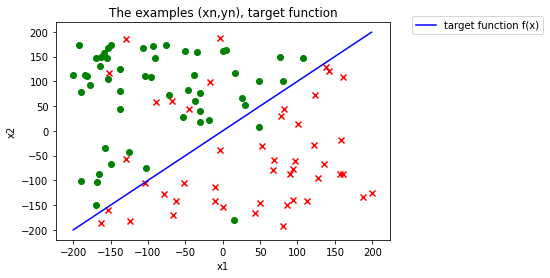

In [15]:
#generating training data set of size 100
random.seed(0) #initialize random number generator
x1 = np.zeros(100)
x2 = np.zeros(100)
y = np.zeros(100)

for i in range (0,100):
    x1[i] = random.randint(-200,200) #specify the range
    x2[i] = random.randint(-200,200)
    if x2[i]<fx(x1[i]):
        y[i] = -1
    else:
        y[i] = 1

# to get non-separable data flip N/10 labels:
    if i < 10:
        y[i] = y[i]*(-1)
        
for i in range (0,100):        
    if y[i] > 0:
        plt.scatter(x1[i],x2[i], color = 'green')
    else:
        plt.scatter(x1[i],x2[i], color = 'red',marker = 'x')
        
#let's plot our data set and the target function    
z = np.arange(-200,200)
plt.plot(z,fx(z), label = 'target function f(x)', color = 'blue')
plt.title ('The examples (xn,yn), target function')
plt.legend(bbox_to_anchor = (1.05,1.05))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

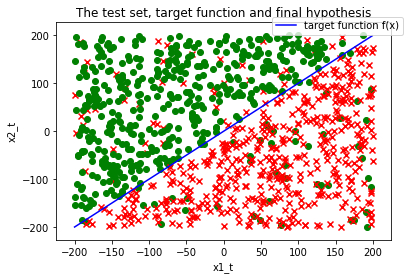

In [16]:
#generating test set of size 1000 of the same nature
random.seed(1) #initialize random number generator
x1_t = np.zeros(1000)
x2_t = np.zeros(1000)
y_t = np.zeros(1000)

for i in range (0,1000):
    x1_t[i] = random.randint(-200,200) #specify the range
    x2_t[i] = random.randint(-200,200)
    if x2_t[i]<fx(x1_t[i]):
        y_t[i] = -1
    else:
        y_t[i] = 1
        
# to get non-separable data flip N/10 labels
    if i < 100:
        y_t[i] = y_t[i]*(-1)
        
for i in range (0,1000):        
    if y_t[i] > 0:
        plt.scatter(x1_t[i],x2_t[i], color = 'green')
    else:
        plt.scatter(x1_t[i],x2_t[i], color = 'red',marker = 'x')
        
#let's plot the training set and the target function    
d = np.arange(-200,200)
plt.plot(d,fx(d), label = 'target function f(x)', color = 'blue')
plt.title ('The test set, target function and final hypothesis')
plt.legend(bbox_to_anchor = (1.05,1.05))
plt.xlabel("x1_t")
plt.ylabel("x2_t")
plt.show()

In [17]:
#PLA for data set          
#PLA implementation
def PLA(A, B):
    w_p = random.sample(range(-20,20),3) 
    w_t = w_p
    E_in_w_t = []
    E_in_w_t_w = []
    
    for i in range(0, 1000):
        E_w_t = 0
        E_w_t_w = 0
        
        for с in range (0,len(A)):
            if (w_t[0]+w_t[1]*A[с][1]+w_t[2]*A[с][2])*B[с] <= 0:
                E_w_t += 1
            if (w_p[0]+w_p[1]*A[с][1]+w_p[2]*A[с][2])*B[с] <= 0:
                E_w_t_w +=  1            
        
        E_w_t = E_w_t/len(A)
        E_w_t_w = E_w_t_w/len(A)
        E_in_w_t.append(E_w_t)
        E_in_w_t_w.append(E_w_t_w)
        
        for j in range(len(A)-1, -1, -1):        
            if (w_t[0]+w_t[1]*A[j][1]+w_t[2]*A[j][2])*B[j] <= 0:
                w_t = w_t + B[j]*A[j]
                break
            else: 
                continue
            
        for b in range(0, len(A)):
            if (w_t[0]+w_t[1]*A[b][1]+w_t[2]*A[b][2])*B[b] <= 0:
                E_w_t += 1
                
        if E_w_t/len(A) < E_w_t_w:
            w_p = w_t

    return w_p
    
#initializing matrix for training set
A = np.zeros((100,3))
for i in range (0,100):
    for j in range (0,3):
        if j == 0:
            A[i][j] = 1 #bias
        elif j == 1:
            A[i][j] = x1[i]
        else:
            A[i][j] = x2[i]

w_pocket = PLA(A,y)
print("Pocket PLA Weights: w_pocket = ", w_pocket)

Pocket PLA Weights: w_pocket =  [   6. -283.  299.]


In [18]:
a = np.zeros((2, len(x1)))
for i in range(0,2):
    for j in range(0, len(x1)):
        if i == 0:
            a[i][j] = x1[j]
        else:
            a[i][j] = x2[j]

w_lin = lin_reg(a,y)

print("Linear Regression Weights: w_lin = ", np.transpose(w_lin))


Linear Regression Weights: w_lin =  [[-0.11956469 -0.00385987  0.0037601 ]]


In [19]:
#constructing matrix for testing PLA 
A_t = np.zeros((1000,3))

for i in range (0,1000):
    for j in range (0,3):
        if j == 0:
            A_t[i][j] = 1 #bias
        elif j == 1:
            A_t[i][j] = x1_t[i]
        else:
            A_t[i][j] = x2_t[i]
Err_l = 0
Err_p = 0

#Estimating the performance of the two weight vectors with the test set to get  𝐸𝑡𝑒𝑠𝑡(𝑤𝑝𝑜𝑐𝑘𝑒𝑡)  and  𝐸𝑡𝑒𝑠𝑡(𝑤𝑙𝑖𝑛) , in terms of the 0/1 loss (classification).
for i in range(0,1000):
    if (w_lin[0]+w_lin[1]*A_t[i][1]+w_lin[2]*A_t[i][2])*y_t[i] <= 0:
        Err_l += 1
    if (w_pocket[0]+w_pocket[1]*A_t[i][1]+w_pocket[2]*A_t[i][2])*y_t[i] <= 0:
        Err_p += 1
    
print("Linear Regression Weights Error =", Err_l/1000)
print("PLA Weights Error =", Err_p/1000)

Linear Regression Weights Error = 0.147
PLA Weights Error = 0.106


In [20]:
def dataset_generator(fx):
  
  x1_t = np.zeros(1000)
  x2_t = np.zeros(1000)
  y_t = np.zeros(1000)

  for i in range (0,1000):
      x1_t[i] = random.randint(-200,200) #specify the range
      x2_t[i] = random.randint(-200,200)
      if x2_t[i]<fx(x1_t[i]):
          y_t[i] = -1
      else:
          y_t[i] = 1
        
# to get non-separable data flip N/10 labels
  if i < 100:
      y_t[i] = y_t[i]*(-1)
  return x1_t, x2_t, y_t

In [21]:
def matrix_generator(m,n):
  M = np.zeros((1000,3))

  for i in range (0,1000):
    for j in range (0,3):
        if j == 0:
            M[i][j] = 1 #bias
        elif j == 1:
            M[i][j] = m[i]
        else:
            M[i][j] = n[i]
  return M


In [22]:
def repeat(matrix_generator, dataset_generator, fx, w_lin, w_pocket):
  Err_linear = np.zeros(100)
  Err_pocket = np.zeros(100)
  for k in range(0,100):
    new_dataset = dataset_generator(fx)
    x1new_t = new_dataset[0] 
    x2new_t = new_dataset[1] 
    ynew_t = new_dataset[2] 
    X = matrix_generator(x1new_t, x2new_t)
    Err_l = 0
    Err_p = 0
    for i in range(0,1000):
      if (w_lin[0]+w_lin[1]*X[i][1]+w_lin[2]*X[i][2])*ynew_t[i] <= 0:
        Err_l += 1
      if (w_pocket[0]+w_pocket[1]*X[i][1]+w_pocket[2]*X[i][2])*ynew_t[i] <= 0:
        Err_p += 1
    Err_linear[k] = Err_l/1000
    Err_pocket[k] = Err_p/1000
  return Err_linear, Err_pocket



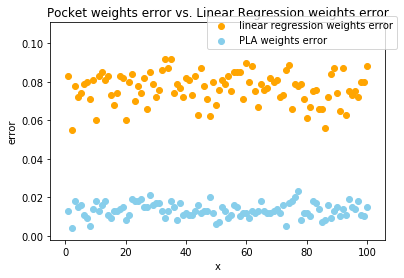

In [23]:
x = repeat(matrix_generator, dataset_generator, fx, w_lin, w_pocket)[0]
y = repeat(matrix_generator, dataset_generator, fx, w_lin, w_pocket)[1]
d = np.arange(1,101)

plt.scatter(d,x, label = 'linear regression weights error', color = 'orange')
plt.scatter(d,y, label = 'PLA weights error', color = 'skyblue')
plt.title ('Pocket weights error vs. Linear Regression weights error')
plt.legend(bbox_to_anchor = (1.05,1.05))
plt.xlabel("x")
plt.ylabel("error")
plt.show()